# Reconhecimento Automático de Placas de Veículos (ANPR)

O reconhecimento automático de placas de veículos (ANPR) é uma tecnologia essencial em diversas aplicações, como controle de acesso, monitoramento de tráfego e segurança pública. Tradicionalmente, esse problema pode ser abordado utilizando técnicas de processamento digital de imagens, que permitem a detecção e extração de informações relevantes a partir de imagens ou vídeos.

<img src="https://f5b623aa.rocketcdn.me/wp-content/uploads/2022/08/Blog_Automatic-Number-Plate-Recognition-ANPR.jpg" width=500>

As técnicas tradicionais de processamento de imagens incluem métodos para segmentação de objetos, transformações morfológicas e reconhecimento óptico de caracteres (OCR). Essas técnicas possibilitam a detecção da placa, a extração dos caracteres contidos nela e o reconhecimento dos dígitos, superando desafios como diferentes ângulos de visualização, variações nos modelos de placas e carros, movimentação dos veículos, mudanças na iluminação e até mesmo objetos que cobrem parcialmente a placa.

Este projeto tem como objetivo demonstrar a utilidade dessas técnicas de processamento de imagens aplicadas ao reconhecimento de placas de veículos. Além disso, nesta aula, detalharemos os passos utilizados para implementar esse sistema de reconhecimento, proporcionando uma compreensão prática e aplicada do processo.


## Qual é o problema?

* Diferentes ângulos de captura
* Variações nos modelos de placas
* Diversos modelos de veículos
* Movimentação do veículo
* Diferenças na iluminação
* Objetos cobrindo parte da placa
* Falta de um dataset brasileiro robusto e abrangente

## Premissas desta aula

* A foto contém exclusivamente um carro.
* O padrão de placa será Mercosul, ou seja, letras escuras em um fundo claro.

## Fluxo do Algoritmo

1. **Converter a imagem para grayscale**:
    * Transformar a imagem para escala de cinza para simplificar o processamento.
  
2. **Transformações Morfológicas Black Hat**:
    * Revelar caracteres escuros contra fundos claros.
    * Na morfologia matemática e no processamento digital de imagens, a transformação top-hat é uma operação que extrai pequenos elementos e detalhes das imagens. Existem dois tipos de transformações top-hat: a transformação top-hat branca e a transformação top-hat preta. A transformação top-hat branca pode ser definida como a diferença entre a imagem de entrada e sua abertura por algum elemento estruturante, enquanto a transformação top-hat preta pode ser definida como a diferença entre o fechamento e a imagem de entrada. Transformações top-hat podem ser usadas para diversas tarefas de processamento de imagens, como extração de características, equalização de fundo, melhoria de imagem, entre outras.
    * É importante notar que o tamanho, ou largura, dos elementos extraídos pelas transformações top-hat pode ser controlado pela escolha do elemento estruturante. Quanto maior o kernel, maiores os elementos extraídos.

3. **Operação de Fechamento**:
    * Preencher gaps e áreas pequenas para identificar estruturas maiores.

4. **Calcular o Gradiente de Magnitude (eixo x)**:
    * Utilizar a imagem da transformação Black Hat.
    * Normalizar o resultado dentro da escala [0, 255].

5. **Suavização e Threshold Binário**:
    * Suavizar a imagem, aplicar uma transformação de fechamento e um threshold binário usando o método de Otsu.

---

Este projeto servirá como uma introdução prática ao uso de técnicas de processamento digital de imagens para o reconhecimento de placas de veículos.

In [1]:
# Baixar as imagens que serão usadas no notebook
!wget https://raw.githubusercontent.com/carlosfab/visao-computacional/main/data/placa-carro.png

--2024-07-09 22:20:57--  https://raw.githubusercontent.com/carlosfab/visao-computacional/main/data/placa-carro.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 612333 (598K) [image/png]
Saving to: ‘placa-carro.png’

placa-carro.png     100%[===================>] 597.98K  --.-KB/s    in 0.07s   

2024-07-09 22:20:58 (8.69 MB/s) - ‘placa-carro.png’ saved [612333/612333]



In [2]:
# importar os nossos pacotes
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import numpy as np

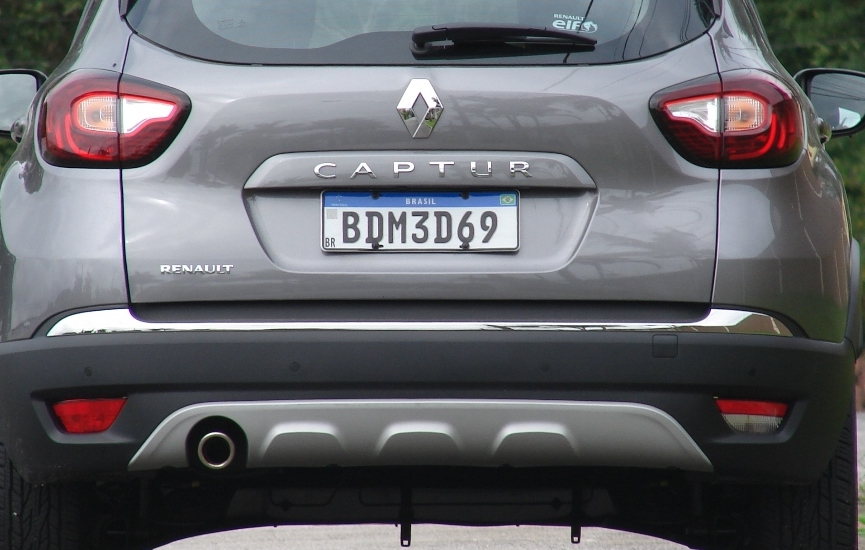

In [3]:
image = cv2.imread("/content/placa-carro.png") # BGR
cv2_imshow(image) # Ele "corrige" a ordem dos canais

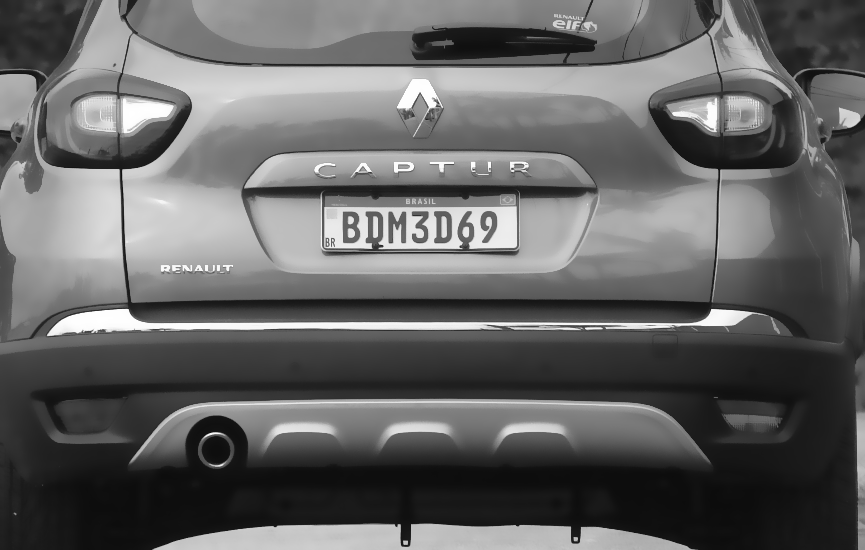

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 13, 15, 15)

cv2_imshow(gray)

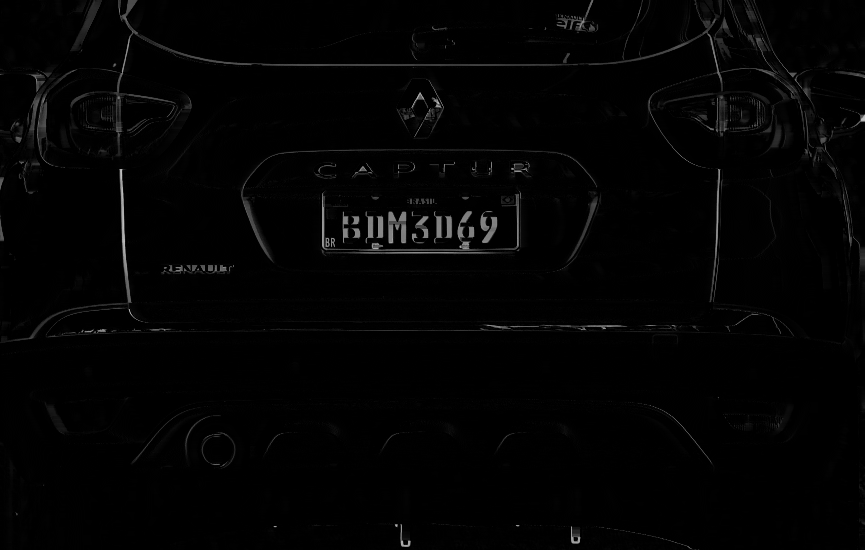

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 3))
black_hat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

cv2_imshow(black_hat)

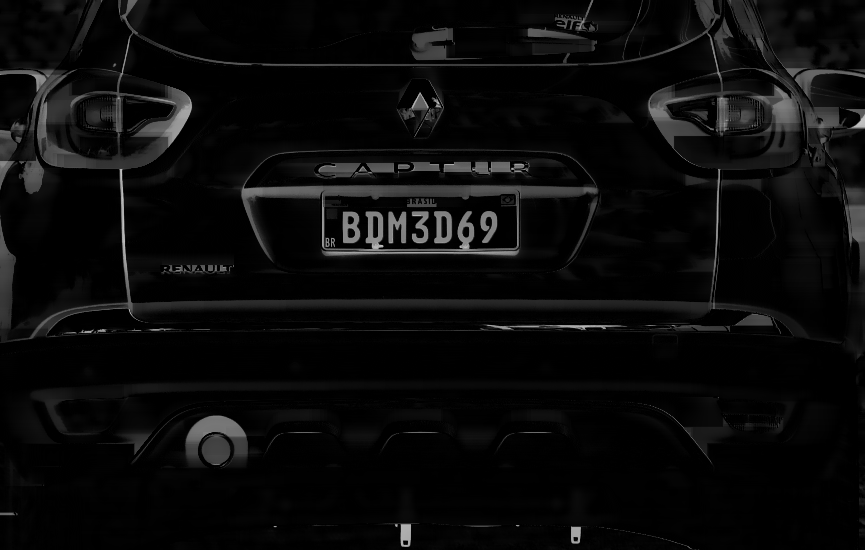

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13))
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 3))
black_hat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

cv2_imshow(black_hat)

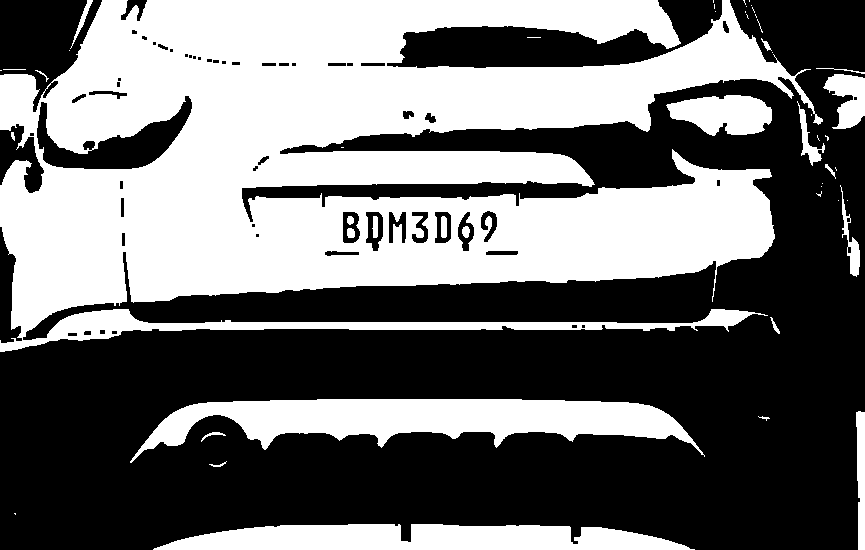

In [7]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
luz = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel2)
luz = cv2.threshold(luz, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

cv2_imshow(luz)

Antes:
0.0
3085.0

Depois
0.0
255.0


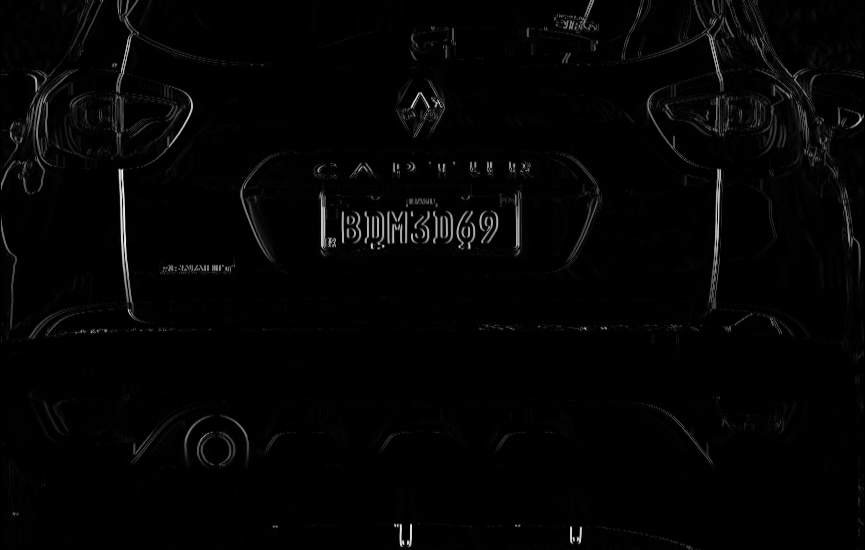

In [8]:
gradient_x = cv2.Sobel(black_hat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradient_x = np.absolute(gradient_x)

# valores acima de 255
print("Antes:")
print(np.min(gradient_x))
print(np.max(gradient_x))

# extrair valores minimos e máximos
(minimo, maximo) = (np.min(gradient_x), np.max(gradient_x))

# normalizar (valor - min) / (max - min)
gradient_x = 255 * ((gradient_x - minimo) / (maximo - minimo))

# ver valores minimos e máximos
print("\nDepois")
print(np.min(gradient_x))
print(np.max(gradient_x))

# vamos para UINT8
gradient_x = gradient_x.astype("uint8")

# ver a imagem
cv2_imshow(gradient_x)

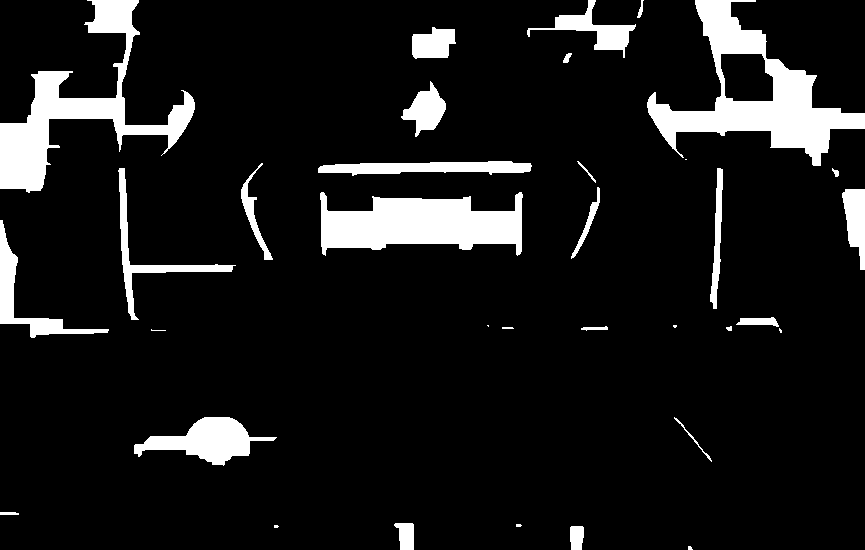

In [9]:
gradient_x = cv2.GaussianBlur(gradient_x, (5, 5), 0)
# cv2_imshow(gradient_x)
gradient_x = cv2.morphologyEx(gradient_x, cv2.MORPH_CLOSE, kernel)
# cv2_imshow(gradient_x)
thres = cv2.threshold(gradient_x, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2_imshow(thres)

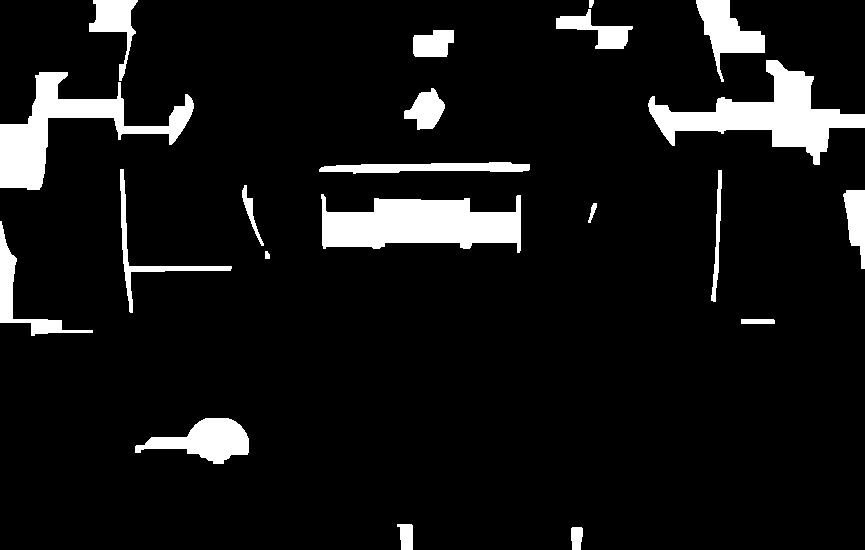

In [ ]:
thres = cv2.erode(thres, None, iterations=2)  # 2
thres = cv2.dilate(thres, None, iterations=1) # 1

cv2_imshow(thres)

In [ ]:
contornos = cv2.findContours(thres.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = imutils.grab_contours(contornos)
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:5]

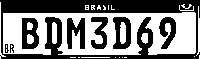

In [ ]:
for c in contornos:
    (x, y, w, h) = cv2.boundingRect(c)
    proporcao = w / h

    # dimensoes da placa: 40x13cm
    if proporcao >=2.5 and proporcao <=4:
        area_placa_identificada = gray[y: y + h, x: x + w]
        placa_recortada = cv2.threshold(area_placa_identificada, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
        cv2_imshow(placa_recortada)